# Predicting H2 Equivalence and Reaction Time in Catalytic H2 Release

## Introduction

This data set is taken from some of the research carried out during my Ph.D in chemistry. It details the various reaction conditions used in the catalytic release of hydrogen as an alternative and more environmentally friendly fuel source. While this research gave promising results, the reaction conditions require further optimisation, which means countless more experiments and time spent in the laboratory, changing one small reaction parameter at a time. Machine learning negates the need for this lengthy process and is therefore an ideal tool for assisting in such chemical problems. It has recently been utilised in predicting reaction times and conditions in very specific types of chemical reactions. It was my desire to apply machine learning to this particular data set and analyse its performance in this topical area of chemistry. By learning from such a data set, the ultimate goal is to be able to input the chemical structure of a catalyst and for the computer to return the various reaction conditions required for an optimal reaction. This notebook is my first attempt at machine learning and reports my inital findings using the open source library fastai, which will be further built on in the coming months.              

## Data Manipulation

### Loading Libraries and Data File

In [1]:
import pandas as pd

from fastai import *
from fastai.tabular import *

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Data/H2_Database2.csv")
print(df.shape)
df.head()

(250, 19)


,Reaction,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,PR Old,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,PR Old,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,PR Old,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,PR Old,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,PR Old,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


In [3]:
df = df.drop(columns="Reaction")
df.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,None,None,None,None,None,10,None,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


This data set contains 'None' values for empty row inputs which is not compatible with fastai, so these values must be converted to the more formally recognised 'NaN' notation:

In [4]:
df = df.replace("None", np.nan)
df.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
0,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,1.10
1,NaN,NaN,NaN,NaN,NaN,10,NaN,AB,1.0,BH6N,[BH3-][NH3+],0.032394,22,THF,C4H8O,C1CCOC1,60.0,0.07
2,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,0.00016197,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,10,0.5,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,6.0,1.20
3,NaN,NaN,NaN,NaN,NaN,10,NaN,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,24.0,1.20
4,NaN,NaN,NaN,NaN,NaN,10,NaN,AB,1.0,BH6N,[BH3-][NH3+],0.032394,42,THF,C4H8O,C1CCOC1,60.0,1.30


### Create Training and Test Sets

This section takes advantage of fastai's useful split function which automatically separates the data into training and test sets, mitigating the need for manual assignment of the X and y values. Such a separation of the data set is necessary as, while carrying out training on the entire data set would return accurate predictions, the learning algorithm would not be as accurate when predicitng similar future data sets. The test size in this instance was initially set to 20%, but it was found that further reduction to 10% resulted in a higher prediction accuracy.    


In [5]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [6]:
df_train.head()

,Code,MF,MW,Mol Catalyst,SMILES (Ligand),Solvent Volume (mL),Catalyst Percentage (%),Substrate,Substrate Weight (g),MF.1,SMILES (Substrate),Mol Substrate,Temperature ©,Solvent,MF.2,SMILES (Solvent),Time (hr),H2 Equivalence
245,DS20_RuOTf,C28H31N2O3SF3Ru,633.69,8.06178E-05,C/C(NC1=C(C)C=CC=C1C)=C/C(C)=NC2=C(C)C=CC=C2C,5,0.5,DMAB,0.95,C2H10BN,[BH3-][NH+](C)C,0.016124,42,Diglyme,C6H14O3,COCOCOC,0.94,0.95
178,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,8.06178E-05,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,5,0.5,DMAB,0.95,C2H10BN,[BH3-][NH+](C)C,0.016124,42,DiMeTHF,C6H12O,CC1CCC(C)O1,0.20,0.90
130,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,6.39851E-05,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,20,0.1,DMAB,3.77,C2H10BN,[BH3-][NH+](C)C,0.063985,40,THF,C4H8O,C1CCOC1,6.00,0.88
159,COC72_RuOTf,C26H27N2O3S3F3Ru,669.76,8.09848E-05,CSC1=C(NC(\C)=C/C(C)=NC2=C(SC)C=CC=C2)C=CC=C1,5,0.5,AB,0.50,BH6N,[BH3-][NH3+],0.016197,42,EmimDCA,C8H11N5,CC[N]1C=C[N+](=C1)C N#C[N-]C#N,40.00,0.90
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIPAB,2.00,C6H18BN,[BH3-][NH+](C(C)C)C(C)C,0.017388,150,NaN,NaN,NaN,20.00,1.00


In [7]:
print("Shape of training set:", df_train.shape)
print("Shape of test set:", df_test.shape)

Shape of training set: (225, 18)
Shape of test set: (25, 18)


### Dealing with Categorical Variables

Following the example given [here](https://docs.fast.ai/tabular.html), the 'dependent' variable was selected and the remaining columns in the data set separated into two variables: 'categorical' and 'continuous'. Once the dependent and categorical variables are assigned, fastai assumes the remaining column data to be continuous variables.    

In [8]:
dep_var1 = "H2 Equivalence"
cat_names = ["Code", "MF", "SMILES (Ligand)", "Substrate", "MF.1", "SMILES (Substrate)", "Solvent", "MF.2", "SMILES (Solvent)"]

## Machine Learning with the First Dependent Variable

Before applying machine learning to the data set, the missing 'NaN' values need to be replaced with something more compatable such as continuous variables, which will be normalised and then fed into the model:

In [9]:
tfms1 = [FillMissing, Categorify]

The now treated information is then passed to the following method which creates the DataBunch used for training: 

In [42]:
data1 = TabularDataBunch.from_df("./tmp", df_train, df_test, dep_var1, tfms=tfms1, cat_names=cat_names)

In [11]:
print(data1.train_ds.cont_names)

['Catalyst Percentage (%)', 'MW', 'Temperature ©', 'Time (hr)', 'Solvent Volume (mL)', 'Mol Substrate', 'Mol Catalyst', 'Substrate Weight (g)']


Now that the data set is ready for training, a Learner model is created using the TabularModel: 

In [12]:
learn1 = get_tabular_learner(data1, layers=[100,100])

In [13]:
learn1.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


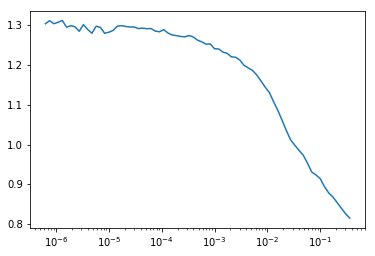

In [14]:
learn1.recorder.plot()

In [15]:
learn1.fit_one_cycle(30, 10e-2)

Total time: 00:09
epoch  train_loss  valid_loss
1      1.142879    0.762017    (00:00)
2      0.877760    0.254128    (00:00)
3      0.651418    0.471541    (00:00)
4      0.526795    0.214805    (00:00)
5      0.434487    0.165588    (00:00)
6      0.362717    0.171176    (00:00)
7      0.314852    0.213320    (00:00)
8      0.280246    0.248673    (00:00)
9      0.256746    0.517450    (00:00)
10     0.238227    0.175017    (00:00)
11     0.217599    0.310479    (00:00)
12     0.199374    0.171866    (00:00)
13     0.181964    0.257174    (00:00)
14     0.167727    0.251190    (00:00)
15     0.154992    0.209429    (00:00)
16     0.142428    0.191737    (00:00)
17     0.131565    0.184842    (00:00)
18     0.122127    0.165292    (00:00)
19     0.112687    0.158228    (00:00)
20     0.105718    0.187252    (00:00)
21     0.098488    0.196723    (00:00)
22     0.092401    0.179656    (00:00)
23     0.085963    0.180740    (00:00)
24     0.080117    0.171667    (00:00)
25     0.074715 

The resulting trained data is then split into predictions and targets using the following function:

In [16]:
pred1, targ1 = learn1.get_preds()

In [17]:
pred1

tensor([1.2183, 0.8190, 0.8720, 0.8356, 1.2826, 0.8631, 0.8668, 0.6110, 0.9273,
        0.1387, 0.2982, 0.1999, 0.9012, 0.2790, 0.1942, 0.3310, 0.2938, 0.3442,
        0.4706, 0.3206, 0.8893, 0.8964, 0.5058, 0.3099, 0.6853])

In [18]:
targ1

tensor([1.4000, 1.5000, 0.9500, 0.9000, 1.4000, 1.0000, 0.9000, 1.9000, 0.8500,
        0.1200, 0.6000, 0.6000, 0.9800, 1.0000, 0.0400, 0.9000, 0.1700, 0.9000,
        0.0200, 1.0000, 0.9000, 0.9500, 0.9000, 0.3500, 0.8500])

In order to see a more comparable value the difference between the prediction and target values are calculated and the percentage accuracy displayed:

In [19]:
diff1 = pred1-targ1

In [20]:
diff1

tensor([-0.1817, -0.6810, -0.0780, -0.0644, -0.1174, -0.1369, -0.0332, -1.2890,
         0.0773,  0.0187, -0.3018, -0.4001, -0.0788, -0.7210,  0.1542, -0.5690,
         0.1238, -0.5558,  0.4506, -0.6794, -0.0107, -0.0536, -0.3942, -0.0401,
        -0.1647])

In [21]:
prct1 = targ1/pred1*100

In [22]:
prct1

tensor([114.9161, 183.1556, 108.9479, 107.7008, 109.1550, 115.8599, 103.8346,
        310.9689,  91.6630,  86.5172, 201.2339, 300.1357, 108.7410, 358.3844,
         20.5984, 271.9404,  57.8578, 261.4555,   4.2496, 311.9506, 101.2073,
        105.9842, 177.9478, 112.9530, 124.0348])

In [23]:
results1 = pd.DataFrame(data = np.column_stack((targ1.numpy(),pred1.numpy(),diff1.numpy(),prct1.numpy())), columns = ["Targets1","Predictions1","Difference1","Percentage1"])

In [43]:
results1.head(25)

,Targets1,Predictions1,Difference1,Percentage1
0,1.40,1.218280,-0.181720,114.916100
1,1.50,0.818976,-0.681024,183.155640
2,0.95,0.871977,-0.078023,108.947861
3,0.90,0.835648,-0.064352,107.700821
4,1.40,1.282580,-0.117420,109.154999
5,1.00,0.863111,-0.136889,115.859947
6,0.90,0.866763,-0.033237,103.834625
7,1.90,0.610994,-1.289006,310.968872
8,0.85,0.927310,0.077310,91.662994
9,0.12,0.138701,0.018701,86.517174


### Dealing with New Categorical Variables

It was desirable to feed two dependent variables into the deep learning network, however, fastai would not accept the two different variables in the one command, thus a second learning model was carried out.

In [55]:
dep_var2 = "Time (hr)"
cat_names = ["Code", "MF", "SMILES (Ligand)", "Substrate", "MF.1", "SMILES (Substrate)", "Solvent", "MF.2", "SMILES (Solvent)"]

## Machine Learning with the Second Dependent Variable

In [50]:
tfms2 = [FillMissing, Categorify]

In [56]:
data2 = TabularDataBunch.from_df("./tmp", df_train, df_test, dep_var2, tfms=tfms2, cat_names=cat_names)

In [57]:
print(data2.train_ds.cont_names)

['Catalyst Percentage (%)_na', 'Catalyst Percentage (%)', 'MW', 'Temperature ©', 'Solvent Volume (mL)_na', 'Mol Catalyst_na', 'Solvent Volume (mL)', 'Mol Substrate', 'Mol Catalyst', 'H2 Equivalence', 'MW_na', 'Substrate Weight (g)']


In [29]:
learn2 = get_tabular_learner(data2, layers=[100,100])

In [30]:
learn2.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


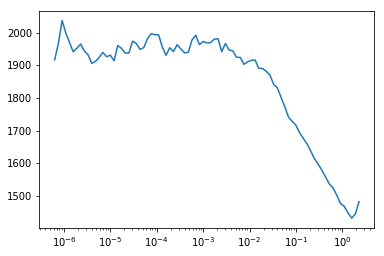

In [31]:
learn2.recorder.plot()

In [32]:
learn2.fit_one_cycle(50, 10e-1)

Total time: 00:16
epoch  train_loss  valid_loss   
1      1774.209595  2845.753418   (00:00)
2      1339.095215  27025.394531  (00:00)
3      1198.118042  1889.038696   (00:00)
4      1088.488403  2438.868652   (00:00)
5      962.343018  7244.322266    (00:00)
6      890.747131  2355.362549    (00:00)
7      824.455017  3560.395020    (00:00)
8      773.089966  1533.287231    (00:00)
9      718.554382  1708.739746    (00:00)
10     669.842712  1724.400513    (00:00)
11     651.114319  1331.041382    (00:00)
12     630.477600  1404.446411    (00:00)
13     625.496643  1461.698730    (00:00)
14     610.908142  1364.670044    (00:00)
15     593.056763  1840.422363    (00:00)
16     598.404480  1924.343018    (00:00)
17     611.121643  1767.449829    (00:00)
18     618.682129  1219.289185    (00:00)
19     607.230469  1449.482544    (00:00)
20     587.376343  1862.963745    (00:00)
21     587.137268  1711.497559    (00:00)
22     569.564819  1849.307983    (00:00)
23     570.463745  1246.6

In [33]:
pred2, targ2 = learn2.get_preds()

In [34]:
pred2

tensor([49.9951,  0.7206,  1.2125, -1.2059, 32.0551, 62.3219,  0.9811, 28.8216,
         6.1381, 77.3440, 29.5177, 82.7907,  3.9963, 27.0157, 34.7289, 26.0493,
        80.7221, 27.0562, 61.7347, 27.5223,  1.5195,  1.3925, 25.1229, 32.6327,
         0.1599])

In [35]:
targ2

tensor([ 25.0000,  40.0000,   0.4000,   0.0400,   7.0000,  60.0000,   0.2000,
        110.0000,   2.0000,  90.0000,  40.0000,  90.0000,   2.7000,  20.0000,
        150.0000,   0.5000, 115.0000,  14.0000,  15.0000,   5.0000,   2.0000,
          5.0000,   0.5000,  20.0000,   0.0400])

In [36]:
diff2 = pred2-targ2

In [37]:
diff2

tensor([  24.9951,  -39.2794,    0.8125,   -1.2459,   25.0551,    2.3219,
           0.7811,  -81.1784,    4.1381,  -12.6560,  -10.4823,   -7.2093,
           1.2963,    7.0157, -115.2711,   25.5493,  -34.2779,   13.0562,
          46.7347,   22.5223,   -0.4805,   -3.6075,   24.6229,   12.6327,
           0.1199])

In [38]:
prct2 = targ2/pred2*100

In [39]:
prct2

tensor([  50.0049, 5550.9819,   32.9897,   -3.3171,   21.8374,   96.2744,
          20.3848,  381.6583,   32.5834,  116.3633,  135.5120,  108.7078,
          67.5619,   74.0311,  431.9165,    1.9194,  142.4640,   51.7442,
          24.2975,   18.1671,  131.6219,  359.0717,    1.9902,   61.2883,
          25.0174])

In [40]:
results2 = pd.DataFrame(data = np.column_stack((targ2.numpy(),pred2.numpy(),diff2.numpy(),prct2.numpy())), columns = ["Targets2","Predictions2","Difference2","Percentage2"])

In [41]:
results2.head(25)

,Targets2,Predictions2,Difference2,Percentage2
0,25.00,49.995117,24.995117,50.004883
1,40.00,0.720593,-39.279408,5550.981934
2,0.40,1.212498,0.812498,32.989738
3,0.04,-1.205866,-1.245866,-3.317117
4,7.00,32.055065,25.055065,21.837421
5,60.00,62.321884,2.321884,96.274368
6,0.20,0.981124,0.781124,20.384785
7,110.00,28.821592,-81.178406,381.658295
8,2.00,6.138103,4.138103,32.583355
9,90.00,77.344009,-12.655991,116.363251


## Conclusions

From the initial results, the findings using this particular data set suggest a promising start for deep learning in this area of chemistry. The first dependent variable "H2 Equivalence" was predicted considerably more accurately in contrast to the second dependent variable "Time (hr)". This is more than likely due to the smaller values associated with the first dependent variable, returning almost 50% prediction accuracy (where the value for 'percentage1' is within 10% of 100). As for the second dependent variable, the large differences in values for "Time (hr)" result in a significantly lower prediction accuracy, where only 2 of the returned values were within the desired range.

While this is a good start, the prediction accuracy needs to be improved considerably. This could be achieved with a much larger data set, as the current information is more than likely too small with not enough variations. However, if this does not improve the prediction accuracy it is possible that the model is being underfit and an alternate machine learning method may need to be used.

While the ultimate goal mentioned in the introduction is a long way from being achieved, the first steps have been taken and initial results would suggest that it is definitely possible. A singificant amount of further knowledge is required in order to achieve this long term goal, which would not only accelerate this area of chemistry but also completely change the field as we know it.    